#Q3
Submitted by = m22ai557

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D,ZeroPadding2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
# Define the paths to your image and csv folders
train_val= "./charts/train_val"
test = "./charts/test"
train_path_csv = "./charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_csv)

##TASK 1

In [98]:
# load training dataset in numpy array
def loadimages(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            # Load the images and resize them to (128, 128) with 3 color channels
            img = cv2.imread(os.path.join(train_val, filename))
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # img = Image.open(os.path.join(train_val, filename))
            img_array = np.array(img)
            # Append the array to the list of images
            images.append(img_array)
            labels.append(filename)
    # Convert the string labels to numerical labels
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    return images,labels
x_train,y_train = loadimages(train_val)
x_test,y_test = loadimages(test)

In [99]:
x_train.shape

(1000, 128, 128, 3)

In [100]:
x_test.shape

(50, 128, 128, 3)

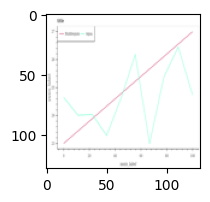

In [101]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [102]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [103]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    # image_label = train_val_labels.iloc[index]['type']
    # plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

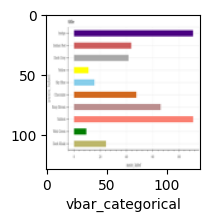

In [104]:
image_sample(x_train,y_train,164)

In [105]:
# now we have mapped the corresponding labels to the image

In [106]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [107]:
x_test.shape

(1000, 128, 128, 3)

In [108]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

##TASK2

In [109]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
    ])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 9s 258ms/step - loss: 10.3342 - accuracy: 0.2096
Epoch 2/10
32/32 [==============================] - 8s 254ms/step - loss: 1.6422 - accuracy: 0.1936
Epoch 3/10
32/32 [==============================] - 8s 254ms/step - loss: 1.5984 - accuracy: 0.2107
Epoch 4/10
32/32 [==============================] - 8s 259ms/step - loss: 1.5847 - accuracy: 0.2353
Epoch 5/10
32/32 [==============================] - 8s 261ms/step - loss: 1.6321 - accuracy: 0.2163
Epoch 6/10
32/32 [==============================] - 8s 261ms/step - loss: 1.5841 - accuracy: 0.2693
Epoch 7/10
32/32 [==============================] - 9s 270ms/step - loss: 1.6059 - accuracy: 0.2126
Epoch 8/10
32/32 [==============================] - 9s 266ms/step - loss: 1.7457 - accuracy: 0.2471
Epoch 9/10
32/32 [==============================] - 9s 276ms/step - loss: 1.5890 - accuracy: 0.2468
Epoch 10/10
32/32 [==============================] - 9s 273ms/step - loss: 1.5817 - accuracy: 0.224

In [110]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [111]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 58ms/step - loss: 1.6209 - accuracy: 0.2600


[1.620883822441101, 0.25999999046325684]

In [112]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]

In [113]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [114]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


##TASK 3

Epoch 1/50
1/1 [==============================] - 11s 11s/step - loss: 1.6141 - accuracy: 0.1813 - val_loss: 1.7739 - val_accuracy: 0.1900
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 1.7190 - accuracy: 0.2025 - val_loss: 1.6362 - val_accuracy: 0.1650
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 1.6154 - accuracy: 0.2087 - val_loss: 1.5904 - val_accuracy: 0.1650
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 1.5793 - accuracy: 0.2087 - val_loss: 1.5531 - val_accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 1.5335 - accuracy: 0.3363 - val_loss: 1.5280 - val_accuracy: 0.3050
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 1.5054 - accuracy: 0.3675 - val_loss: 1.4797 - val_accuracy: 0.4850
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.4613 - accuracy: 0.4950 - val_loss: 1.4503 - val_accuracy: 0.4900
Epoch 8/50
1/1 [=======================

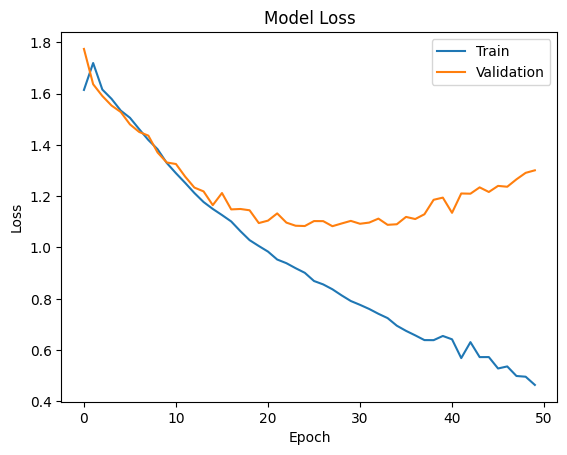

In [115]:
# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [116]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 24ms/step - loss: 1.3008 - accuracy: 0.5700


[1.3007519245147705, 0.5699999928474426]

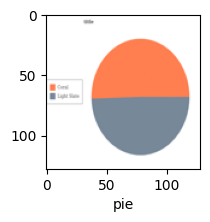

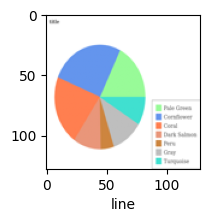

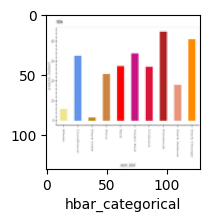

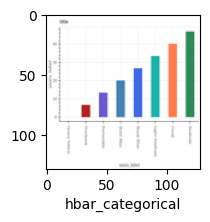

In [117]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [118]:
# Observation: we can see some wrong predictions

In [119]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

array([[6.4188486e-01, 1.8835060e-01, 1.0431240e-01, 1.4717098e-02,
        5.0735001e-02],
       [7.6354496e-02, 1.1845521e-02, 2.8295114e-04, 1.2955412e-02,
        8.9856160e-01],
       [1.7793334e-01, 3.3072485e-03, 6.8306527e-04, 5.1018223e-04,
        8.1756616e-01],
       [6.3711649e-01, 8.2749868e-04, 2.8030572e-02, 3.1407142e-01,
        1.9954057e-02],
       [6.9382888e-01, 1.0677778e-01, 1.6726884e-01, 6.0104318e-03,
        2.6114115e-02]], dtype=float32)

In [120]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 0, 0]

In [121]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [122]:
# here we see some values are not matching

'dot_line'

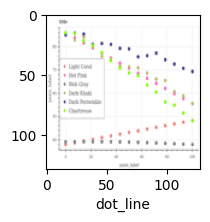

In [123]:
# test actual and predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [124]:
# some values are not matching

In [125]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.46      0.59      0.52        37
           1       0.83      0.80      0.81        44
           2       0.61      0.29      0.39        48
           3       0.38      0.64      0.48        33
           4       0.69      0.58      0.63        38

    accuracy                           0.57       200
   macro avg       0.59      0.58      0.57       200
weighted avg       0.61      0.57      0.57       200



In [126]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[22  5  1  2  7]
 [ 4 35  1  4  0]
 [10  0 14 23  1]
 [ 1  2  7 21  2]
 [11  0  0  5 22]]


Text(95.72222222222221, 0.5, 'Actual')

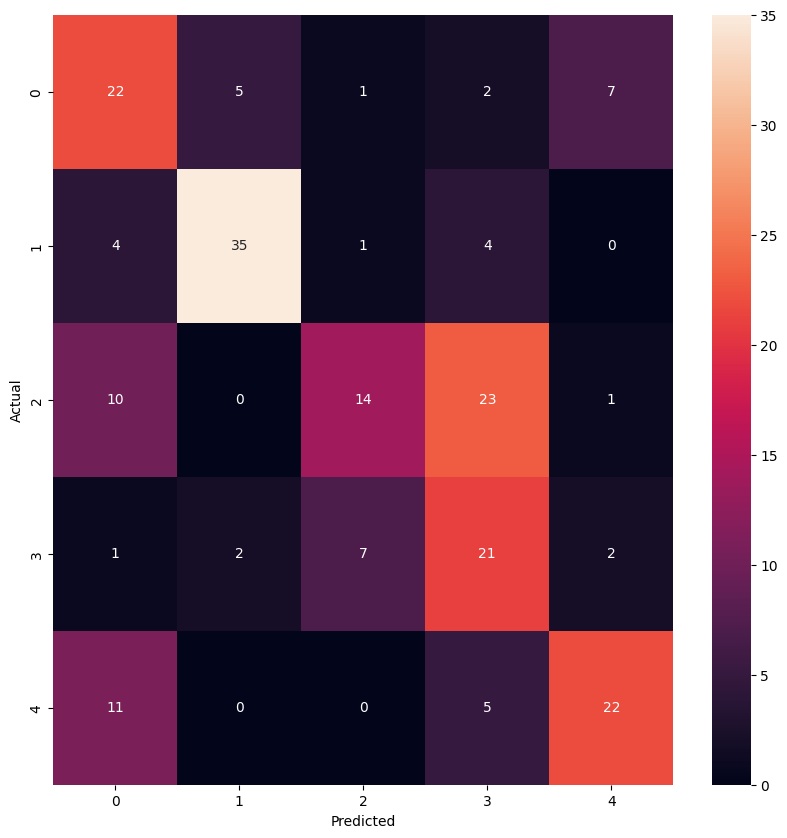

In [127]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [128]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error